Samy Horchani (n° étudiant : 28706765) & Assia Mastor (n° étudiant : )

# Neural Networks performance for generating standard random distributions

In [1]:
import numpy as np
import random
import math
import torch
import time
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# def generate_binomial_variables(n, p, num_samples):
#     # Générer des variables aléatoires uniformes sur [0, 1]
#     uniform_samples = np.random.rand(num_samples)
#     print(uniform_samples)

#     # Calculer les variables aléatoires binomiales en utilisant la fonction de répartition inverse
#     binomial_variables = np.zeros(num_samples, dtype=int)
#     for k in range(num_samples):
#         cumulative_prob = 0
#         for i in range(n):
#             cumulative_prob += p
#             if uniform_samples[k] <= cumulative_prob:
#                 binomial_variables[k] = binomial_variables[k] + 1

#     return binomial_variables


def binomial_coefficient(n, k): #C(n,k)
    """ Calcul du coefficient binomial C(n,k) """
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    k = min(k, n - k)  # Tirer parti de la symétrie
    coeff = 1
    for i in range(k):
        coeff *= (n - i)
        coeff //= (i + 1)
    return coeff

def generate_binomial_variables(n, p, num_samples):
    uniform_samples = np.random.rand(num_samples)
    print(uniform_samples)
    binomial_variables = np.zeros(num_samples, dtype=int)

    for k in range(num_samples):
        cumulative_prob = 0
        for i in range(n + 1):
            prob = binomial_coefficient(n, i) * (p ** i) * ((1 - p) ** (n - i))
            cumulative_prob += prob
            if uniform_samples[k] <= cumulative_prob:
                binomial_variables[k] = i
                break

    return binomial_variables


#Nombre de succes obtenu pour n essaye avec une proba de 0.3 de succes 

In [ ]:
# Exemple d'utilisation avec n=5, p=0.3, et 10 échantillons
n = 2
p = 0.1
num_samples = 10
result = generate_binomial_variables(n, p, num_samples)

print("Échantillons générés avec notre fonction:", result)
print("Moyenne de succes avec notre fct:", np.mean(result))

sample = np.zeros(num_samples, dtype=int)
for i in range(num_samples):
        sample[i] = np.random.binomial(n, p)

print("Échantillons générés avec numpy:", sample)

print("Moyenne de succes avec numpy:", np.mean(sample))

In [ ]:
#Loi expo : utilisé pour modélisé le temps ecoulé entre des event successif d'un process de poisson

def generate_exponential_variable(lmbda):
    # Générer un échantillon U uniformément distribué sur [0, 1]
    u = random.uniform(0, 1)

    # Appliquer la transformation pour obtenir une variable exponentielle
    x = -1.0 / lmbda * math.log(1 - u)

    return x

# Exemple d'utilisation avec lambda = 0.5 et génération de 5 échantillons
lmbda = 0.5
num_samples = 5

# Générer et afficher les échantillons
for i in range(num_samples):
    sample = generate_exponential_variable(lmbda)
    print(f"Échantillon {i+1} : {sample}")


In [ ]:
import numpy as np

def simulate_poisson(lambda_param, t):
    # Générer une suite de variables aléatoires exponentielles
    Tk = np.random.exponential(scale=1/lambda_param, size=1)
    
    # Initialiser la somme cumulée et le compteur
    Sk = Tk
    k = 1
    
    # Appliquer la méthode du rejet
    while Sk <= t:
        Tk = np.random.exponential(scale=1/lambda_param, size=1)
        Sk += Tk
        k += 1
    
    # Retourner le résultat (nombre d'événements k)
    return k - 1

# Exemple d'utilisation avec lambda_param=2 et t=5
lambda_param = 2
t = 5
result = simulate_poisson(lambda_param, t)

print("Résultat de la simulation Poisson:", result)

On va pas code runifoprme admet qu'on en a un et on les appelle + lambda est grand plus bon generateur

Plus on a coupé en 

# POUR LUNDI 5/02

## Simuler les lois de base avec numpy ET Pytorch + comparer les temps d'exécution (le faire sur un nombre conséquent de simulation pour observer les différences de temps de calcul : 100 000 ou 1M ). Bernoulli, Binomial, Poisson, exponentiel, normal, chi2.

## AVEC NUMPY

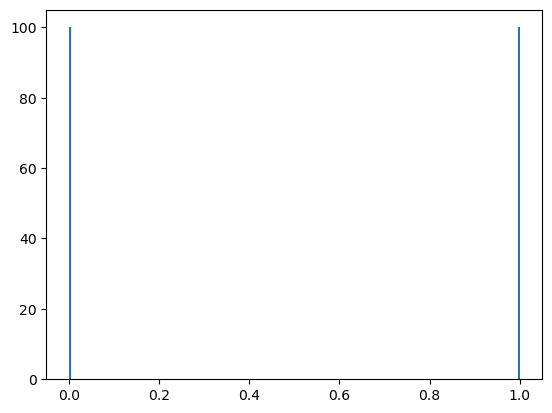

Le temps d'execution avec NUMPY d'une loi BERNOULLI pour 10000000 itérations est de 6.9378862380981445 secondes


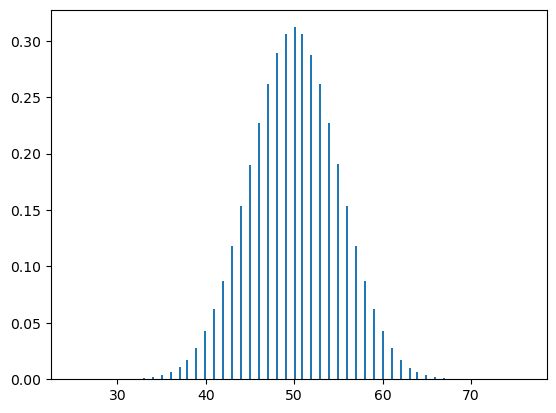

Le temps d'execution avec NUMPY d'une loi BINOMIAL pour 10000000 itérations est de 7.537245988845825 secondes


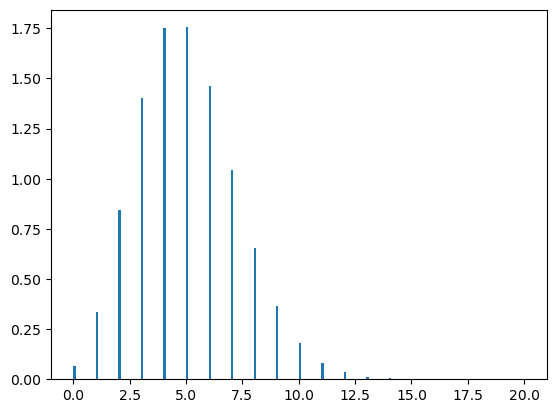

Le temps d'execution avec NUMPY d'une loi POISSON pour 10000000 itérations est de 8.223231792449951 secondes


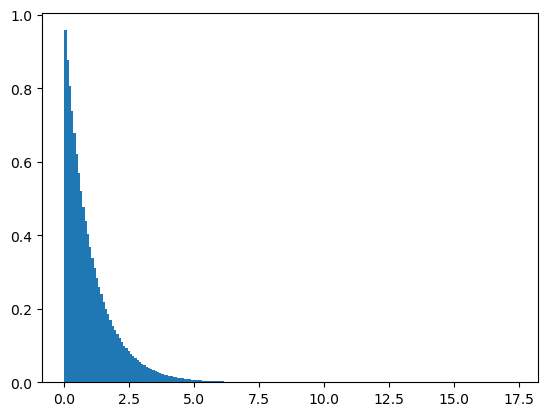

Le temps d'execution avec NUMPY d'une loi EXPONENTIELLE pour 10000000 itérations est de 5.581748008728027 secondes


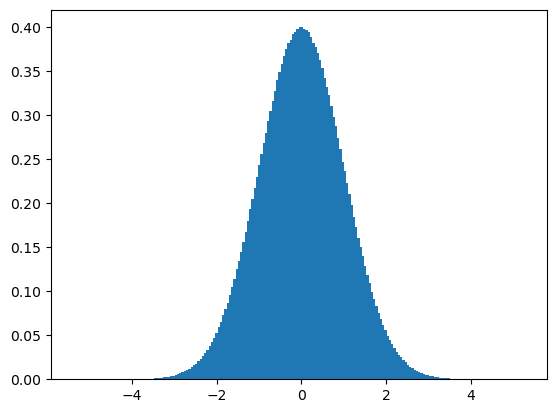

Le temps d'execution avec NUMPY d'une loi NORMALE pour 10000000 itérations est de 7.835700988769531 secondes


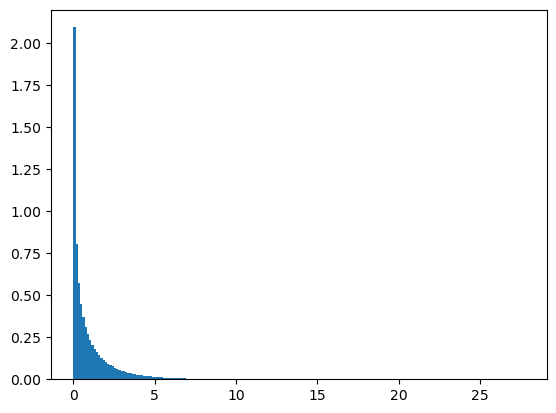

Le temps d'execution avec NUMPY d'une loi CHI2 pour 10000000 itérations est de 6.374344110488892 secondes


In [2]:
#Demander pq dans la doc on nous indique d'utiliser random.Generator.loi pour tout nv code ??
n = 10000000
p=0.5
#Generateur uniforme
G = np.random.uniform(0,1) #Tirer une proba uniforme // PLUS LONG QUE RANDOM.UNIFORM() !!! 

#------------------------------------------------------------------------------------------------------------------------------------
# BERNOULLI
#------------------------------------------------------------------------------------------------------------------------------------

# apparemment, il n'y a pas de generateur de bernouilli
temps_debut = time.time()
for _ in range(n):
    np.random.binomial(1,p, size=None) 
    #autre moyen de le faire ?? : 
    #np.random.choice([0, 1], p=[1-p, p])
temps_fin = time.time()

#Generation du diagramme
s = np.random.binomial(1, p, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi BERNOULLI pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

#------------------------------------------------------------------------------------------------------------------------------------
# BINOMIAL
#------------------------------------------------------------------------------------------------------------------------------------

temps_debut = time.time()
for _ in range(n):
    np.random.binomial(100, p, size=None) #Tirer une proba uniforme
temps_fin = time.time()

s = np.random.binomial(100,p, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi BINOMIAL pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

#------------------------------------------------------------------------------------------------------------------------------------
# POISSON
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.poisson(lam=5, size=None)
temps_fin = time.time()

s = np.random.poisson(lam=5, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi POISSON pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

#------------------------------------------------------------------------------------------------------------------------------------
# EXPONENTIELLE
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.exponential(scale=1.0, size=None)
temps_fin = time.time()

s = np.random.exponential(scale=1.0, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi EXPONENTIELLE pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

#------------------------------------------------------------------------------------------------------------------------------------
# NORMAL
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.normal(0, 1, size=None)
temps_fin = time.time()

s = np.random.normal(0, 1, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi NORMALE pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

#------------------------------------------------------------------------------------------------------------------------------------
# CHI2
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.chisquare(1, size=None)
temps_fin = time.time()

s = np.random.chisquare(1, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()
print("Le temps d'execution avec NUMPY d'une loi CHI2 pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

## AVEC PYTORCH

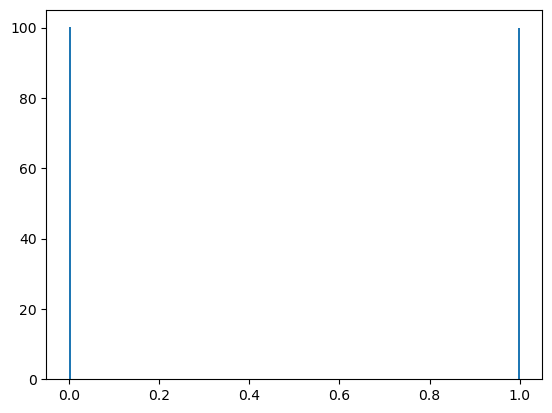

Bernoulli avec PyTorch: 4.34491491317749 secondes
OK


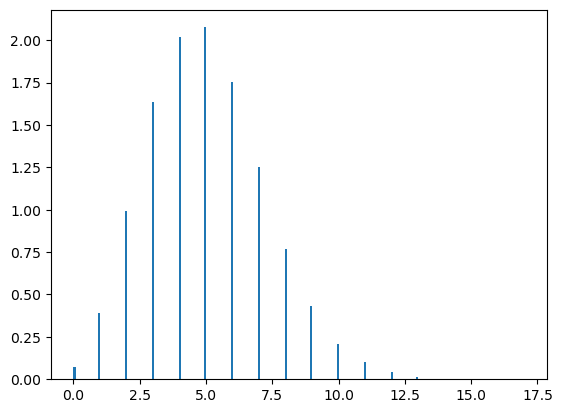

Poisson avec PyTorch: 3.2548251152038574 secondes


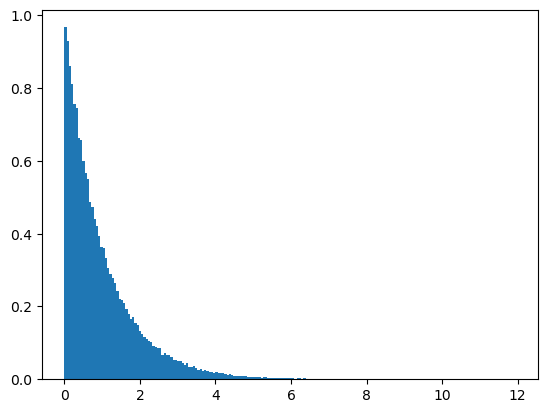

Exponentielle avec PyTorch: 3.709049940109253 secondes


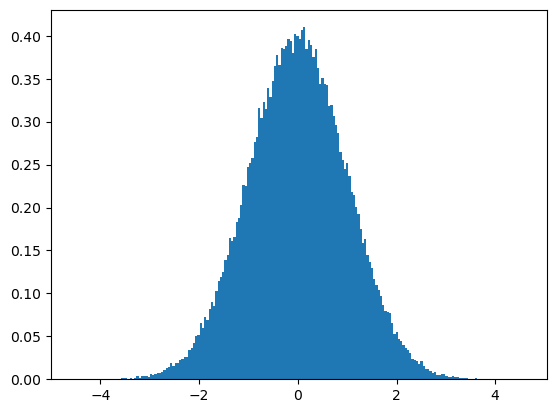

Normale avec PyTorch: 0.32735586166381836 secondes


In [10]:
#PAS SUR

#a = torch.empty(1, 1).uniform_(0, 1)
#print(a)
#n = 1000000
# apparemment, il n'y a pas de generateur de bernouilli
#temps_debut = time.time()
#for _ in range(n):
    #torch.bernoulli(a)
    #autre moyen de le faire ?? : 
    #np.random.choice([0, 1], p=[1-p, p])
#temps_fin = time.time()

#Generation du diagramme
#s = torch.bernoulli(torch.empty(1, n).uniform_(0, 1)).numpy()
#print(s)
#count, bins, ignored = plt.hist(s[0], 200, density=True)
#plt.show()


n = 100000
p = 0.5

# Bernoulli
temps_debut = time.time()
for _ in range(n):
    torch.distributions.Bernoulli(p).sample((1,))
temps_fin = time.time()
bernoulli_samples = torch.distributions.Bernoulli(p).sample((n,))

plt.hist(bernoulli_samples.numpy(), bins=200, density=True)
plt.show()
print("Bernoulli avec PyTorch:", temps_fin - temps_debut, "secondes")


# Binomial (PyTorch n'offre pas directement une distribution binomiale, mais on peut l'approximer avec Bernoulli pour n=1)
# Pour n > 1, il faudrait sommer les échantillons Bernoulli ou utiliser une approche différente.

# Poisson
temps_debut = time.time()
for _ in range(n):
    torch.distributions.Poisson(5).sample((1,))
temps_fin = time.time()
poisson_samples = torch.distributions.Poisson(5).sample((n,))
plt.hist(poisson_samples.numpy(), bins=200, density=True)
plt.show()
print("Poisson avec PyTorch:", temps_fin - temps_debut, "secondes")

# Exponentielle
temps_debut = time.time()
for _ in range(n):
    torch.distributions.Exponential(1.0).sample((1,))
temps_fin = time.time()
exponential_samples = torch.distributions.Exponential(1.0).sample((n,))

plt.hist(exponential_samples.numpy(), bins=200, density=True)
plt.show()
print("Exponentielle avec PyTorch:", temps_fin - temps_debut, "secondes")

# Normale
temps_debut = time.time()
for _ in range(n):
    torch.normal(0, 1, size=(1,))
temps_fin = time.time()
normal_samples = torch.normal(0, 1, size=(n,))

plt.hist(normal_samples.numpy(), bins=200, density=True)
plt.show()
print("Normale avec PyTorch:", temps_fin - temps_debut, "secondes")

# Chi2 jsp comment faire


## NOS PROPRES GENERATEURS

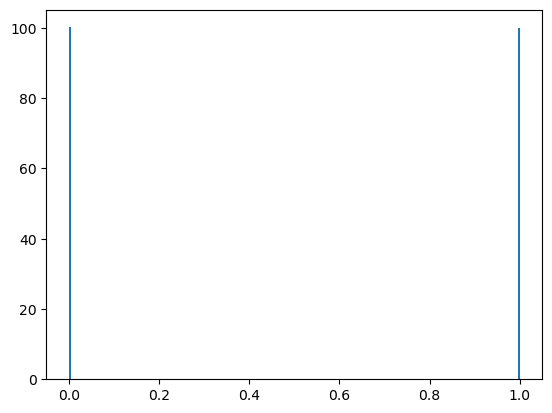

notre Generateur Bernoulli: 0.22445297241210938 secondes


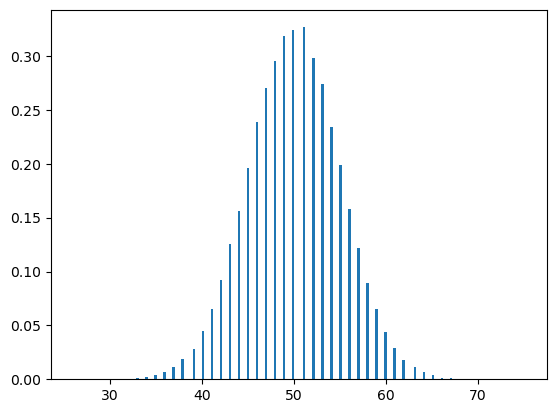

notre Generateur Binomiale avec Bernoulli: 18.83605194091797 secondes


/var/folders/qg/sk176n9x787fz7_y771zbdfh0000gn/T/ipykernel_24505/1827606795.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  samples[i] = binomial(100,p, 1)


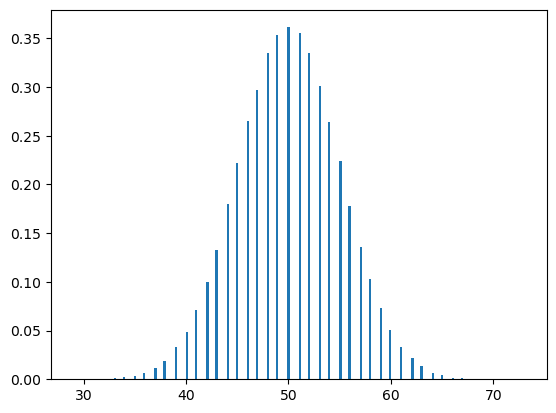

notre Generateur Binomiale sans Bernoulli: 17.300048351287842 secondes


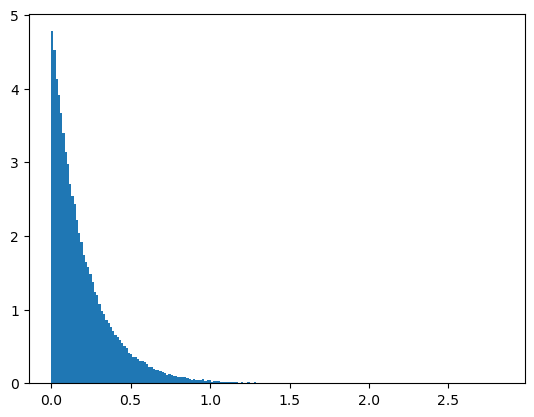

notre Generateur Exponnentielle: 0.3012223243713379 secondes


In [21]:
n = 100000
p = 0.5
#BERNOULLI
def bernoulli(p):
    G = np.random.uniform(0,1)
    if G <= p :
        return 1
    else:
        return 0

samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = bernoulli(p)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.show()
print("notre Generateur Bernoulli:", temps_fin - temps_debut, "secondes")

def binomiale_with_bernoulli(n,p):
    res = 0
    for _ in range(n):
        res = res + bernoulli(p)
    return res

samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = binomiale_with_bernoulli(100,p)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.show()
print("notre Generateur Binomiale avec Bernoulli:", temps_fin - temps_debut, "secondes")

def binomial(n, p, nb_samples=1):
    # Generate nb_samples uniform random numbers
    uniform_samples = np.random.uniform(0, 1, size=nb_samples)
    binomial_variables = np.zeros(nb_samples, dtype=int)

    for k in range(nb_samples):
        cumulative_prob = 0
        for i in range(n + 1):
            prob = binomial_coefficient(n, i) * (p ** i) * ((1 - p) ** (n - i))
            cumulative_prob += prob
            if uniform_samples[k] <= cumulative_prob:
                binomial_variables[k] = i
                break

    return binomial_variables

def binomial_coefficient(n, k): #C(n,k)
    """ Calcul du coefficient binomial C(n,k) """
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    k = min(k, n - k)  # Tirer parti de la symétrie
    coeff = 1
    for i in range(k):
        coeff *= (n - i)
        coeff //= (i + 1)
    return coeff

samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = binomial(100,p, 1)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.show()
print("notre Generateur Binomiale sans Bernoulli:", temps_fin - temps_debut, "secondes")

def exponential(lam): #reutilisation celle déjà faite
    # Générer un échantillon U uniformément distribué sur [0, 1]
    u = np.random.uniform(0, 1) 

    # Appliquer la transformation pour obtenir une variable exponentielle
    x = -1.0 / lam * np.log(1 - u) #pour rester coherent on utilise la biblio numpy ? au lieu de math

    return x


samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = exponential(5)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.show()
print("notre Generateur Exponnentielle:", temps_fin - temps_debut, "secondes")





In [11]:
import numpy as np
import math
import time

def poisson_rejection_numpy(lam):
    start_time = time.time()  # Enregistrer le temps de début de l'exécution

    while True:
        # Générer un échantillon à partir d'une distribution exponentielle
        x = np.random.exponential(scale=1/lam)
        x = int(x)

        # Générer une variable aléatoire uniforme
        u = np.random.rand()

        # Calculer la probabilité de la loi de Poisson
        p = np.exp(-lam) * (lam**x) / math.factorial(x)

        # Accepter ou rejeter l'échantillon
        if u <= p:
            end_time = time.time()  # Enregistrer le temps de fin de l'exécution
            execution_time = end_time - start_time  # Calculer le temps d'exécution
            return x, execution_time

lam = 2  
sample, execution_time = poisson_rejection_numpy(lam)
print("Échantillon de la loi de Poisson avec lambda =", lam, ":", sample)
print("Temps d'exécution:", execution_time, "secondes")



Échantillon de la loi de Poisson avec lambda = 2 : 1
Temps d'exécution: 9.489059448242188e-05 secondes


Temps d'exécution de la fonction box_muller: 0.008523941040039062 secondes


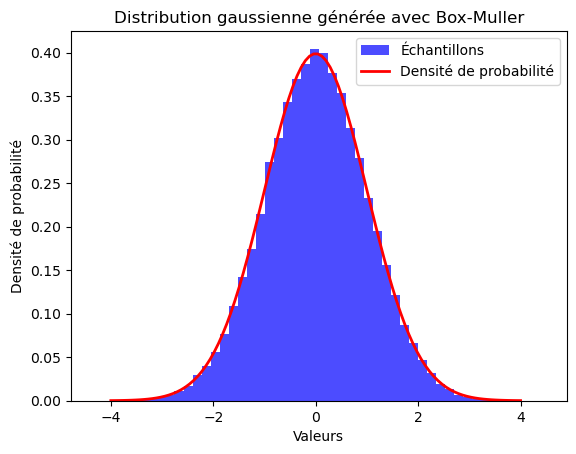

Temps d'exécution de la fonction box_muller: 0.007188081741333008 secondes
Temps d'exécution de la fonction box_muller: 0.006226062774658203 secondes


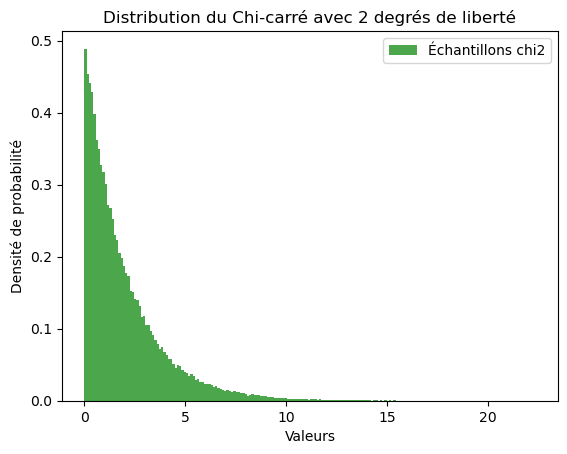

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import time

def box_muller(n_samples):
    start_time = time.time()  # Enregistrer le temps de début de l'exécution
    
    # Générer des nombres aléatoires uniformément distribués
    u1 = np.random.rand(n_samples)
    u2 = np.random.rand(n_samples)

    # Appliquer la méthode de Box-Muller pour générer des échantillons gaussiens
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    end_time = time.time()  # Enregistrer le temps de fin de l'exécution
    execution_time = end_time - start_time  # Calculer le temps d'exécution
    print("Temps d'exécution de la fonction box_muller:", execution_time, "secondes")

    return z0, z1

# Paramètres
n_samples = 100000

# Générer des échantillons gaussiens avec Box-Muller et mesurer le temps d'exécution
z0, z1 = box_muller(n_samples)

# Afficher l'histogramme des échantillons et mesurer le temps d'exécution pour afficher le graphique
plt.hist(z0, bins=50, density=True, alpha=0.7, color='b', label='Échantillons')

# Afficher la densité de probabilité théorique de la distribution gaussienne standard
x = np.linspace(-4, 4, 100)
pdf = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
plt.plot(x, pdf, 'r-', linewidth=2, label='Densité de probabilité')


plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Distribution gaussienne générée avec Box-Muller')
plt.legend()

# Afficher le graphique
plt.show()

# Correction de la fonction chi_square pour utiliser correctement les degrés de liberté
def chi_square(n_samples, degrees_of_freedom):
    # Générer des échantillons gaussiens avec Box-Muller pour chaque degré de liberté
    chi2_samples = 0
    for _ in range(degrees_of_freedom):
        z0, _ = box_muller(n_samples)
        chi2_samples += z0**2  # Somme des carrés pour simuler chi2

    return chi2_samples

degrees_of_freedom = 2
# Générer des échantillons de la distribution du chi-carré avec 2 degrés de liberté
corrected_chi2_samples = chi_square(n_samples, degrees_of_freedom)

# Afficher l'histogramme des échantillons de la distribution du chi-carré
plt.hist(corrected_chi2_samples, bins=200, density=True, alpha=0.7, color='g', label='Échantillons chi2')

# Ajouter des légendes et un titre
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Distribution du Chi-carré avec 2 degrés de liberté')
plt.legend()

# Afficher le graphique
plt.show()

# Afficher l

In [11]:
def generate_poisson(lambda_val, max_val=100):
    # Liste pour stocker les nombres générés
    generated_numbers = []
    # Inverse de la fonction de répartition cumulée jusqu'à max_val
    for k in range(0, max_val + 1):
        # Calcul de la probabilité P(X = k)
        p_k = (np.exp(-lambda_val) * lambda_val**k) / np.math.factorial(k)
        generated_numbers.append((k, p_k))
    
    # Normalisation pour s'assurer que la somme des probabilités est égale à 1
    total_prob = sum([p for _, p in generated_numbers])
    normalized_numbers = [(k, p/total_prob) for k, p in generated_numbers]

    return normalized_numbers

lambda_values = [1, 10, 20, 30, 40, 50]
generated_distributions = {lambda_val: generate_poisson(lambda_val) for lambda_val in lambda_values}

generated_distributions[1][:10], generated_distributions[50][:10]  # Afficher seulement les premiers éléments pour l'aperçu

/var/folders/qg/sk176n9x787fz7_y771zbdfh0000gn/T/ipykernel_19218/336142954.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p_k = (np.exp(-lambda_val) * lambda_val**k) / np.math.factorial(k)


([(0, 0.36787944117144233),
  (1, 0.36787944117144233),
  (2, 0.18393972058572117),
  (3, 0.06131324019524039),
  (4, 0.015328310048810098),
  (5, 0.0030656620097620196),
  (6, 0.0005109436682936699),
  (7, 7.299195261338141e-05),
  (8, 9.123994076672677e-06),
  (9, 1.0137771196302974e-06)],
 [(0, 1.9287498482666826e-22),
  (1, 9.643749241333413e-21),
  (2, 2.410937310333353e-19),
  (3, 4.018228850555588e-18),
  (4, 5.022786063194486e-17),
  (5, 5.022786063194486e-16),
  (6, 4.1856550526620714e-15),
  (7, 2.989753609044337e-14),
  (8, 1.8685960056527106e-13),
  (9, 1.0381088920292837e-12)])